# YOUR FIRST NEURAL NETWORK

I made this tutorial to help new data scientists to build their first neural network.

In [15]:
# We start by importing all the libraries that we need
import os
import numpy as np
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.datasets import mnist

In [16]:
# Building a model with a fonction is a more easier way
# to access the model anywhere in our code.

def build_model():
    """ This function build and compile a keras model. 
    """
    my_model = Sequential()
    
    my_model.add(Dense(64, input_shape=( 28, 28 ), activation='relu'))
    my_model.add(Flatten())
    my_model.add(Dense(32, activation='selu'))
    my_model.add(Dense(32, activation='selu'))
    my_model.add(Dense(10, activation='softmax'))
    
    my_model.compile(loss='categorical_crossentropy',
                     optimizer='rmsprop', metrics=['accuracy'])
    print(my_model.summary())
       
    return my_model
    

In [22]:
# Let's import the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()


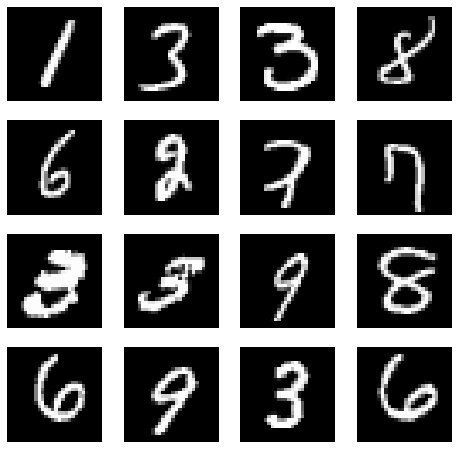

In [23]:
# Now we will take a look at 4 samples of our data

fig, axs = plt.subplots(4, 4, figsize=(8, 8))
for i in range(4):
    for j in range(4):
        indice = np.random.randint(X_train.shape[0])
        axs[i, j].imshow(X_train[indice], cmap='gray')
        axs[i, j].axis("off")


In [24]:
# Reshaping
X_train = X_train / 255
X_test = X_test / 255

# Encoding the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [30]:
%%time

nb_epochs = 20
model_atut = build_model()

# Train our model
history = model_atut.fit(X_train, y_train,
                         epochs= nb_epochs, 
                         batch_size=32, 
                         validation_split=0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 28, 64)            1856      
_________________________________________________________________
flatten_3 (Flatten)          (None, 1792)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 32)                57376     
_________________________________________________________________
dense_23 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_24 (Dense)             (None, 10)                330       
Total params: 60,618
Trainable params: 60,618
Non-trainable params: 0
_________________________________________________________________
None
Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 6s 124us/step - loss: 0.2

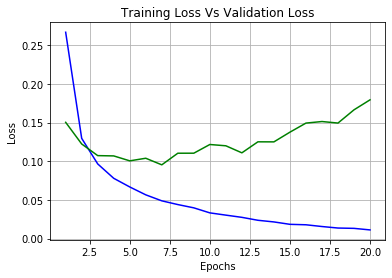

In [76]:
# Monitoring of our model

loss = history.history ['loss']
val_loss = history.history ['val_loss']

acc = history.history ['acc']
val_acc = history.history ['val_acc']

plt.figure()
plt.grid()
plt.plot(range(1, nb_epochs + 1), loss, color='blue')
plt.plot(range(1, nb_epochs + 1), val_loss, color='green')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Vs Validation Loss")
plt.show()


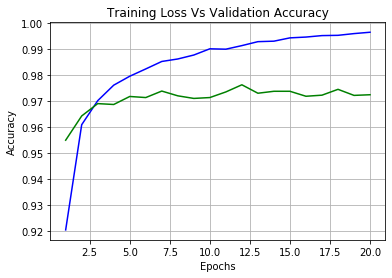

In [78]:
plt.figure()
plt.grid()
plt.plot(range(1, nb_epochs + 1), acc, color='blue')
plt.plot(range(1, nb_epochs + 1), val_acc, color='green')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training Loss Vs Validation Accuracy")
plt.show()


# END